# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [12]:
import math


class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []
    
    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

    def next_to_top(self):
        return self.items[len(self.items) - 2]

    def get_items(self):
        return self.items
    
    def get_numbered_items(self, number):
        return self.items[number]


def remove_points(sorted_list):
    pass

def grahamscan(input_set):
    global lowest_point
    g_stack = Stack()

    lowest_point = find_lowest_point(input_set)
    
    sorted_list = sorted(input_set, key = angle_between_leftmost_lowest)

    for point in sorted_list:
        while g_stack.size() > 2 and ccw(g_stack.next_to_top(), g_stack.peek(), point) <=  0:
            g_stack.pop()
        g_stack.push(point)
    g_stack.push(sorted_list[len(sorted_list) - 1])
    
    return g_stack
    
def get_elems_stack(stack):
    list_stack = []
    for elem_num in range (0, stack.size() -1):
        elemSearched = stack.get_numbered_items(elem_num)
        list_stack.append(elemSearched)
    return list_stack
    
    
def angle_between_leftmost_lowest(coord):
    global lowest_point
    b = lowest_point[0]-coord[0]
    if b == 0:
        return 0
    else:
        angle = (lowest_point[1]-coord[1]) / b 
        if angle >= 0:
            angle = math.atan(angle)
        else:
            angle = math.atan(angle) + math.pi
        return angle

def ccw(next_to_top, top_of_stack, point):
    return (top_of_stack[1] - point[1]) * (next_to_top[0] - point[0]) - (next_to_top[1] - point[1]) * (top_of_stack[0] - point[0])
    

def find_lowest_point(list_of_points):
    min_y = 32767
    x_coor = 32767
    for point in list_of_points:
        if point[1] < min_y:
            min_y = point[1]
            x_coor = point[0]
        elif point[1] == min_y:
            if point[0] < x_coor:
                x_coor = point[0]
    return x_coor, min_y
   

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [13]:
import random

#code for random data generation

def generate_points(number_of_points):
    inputSet = []

    for point in range(number_of_points):
        x = random.randint(0,32767)
        y = random.randint(0,32767)

        inputSet.append((x,y))
    
    return inputSet

#code for worst case data generation



Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [1]:
import timeit
#test code
input_set_100 = generate_points(100)
input_set_500 = generate_points(500)
input_set_1000 = generate_points(1000)
input_set_5000 = generate_points(5000)
input_set_10000 = generate_points(10000)
input_set_15000 = generate_points(15000)
input_set_20000 = generate_points(20000)

start_time = timeit.default_timer()
n = 100
grahamscan(input_set_100)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 500
grahamscan(input_set_500)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 1000
grahamscan(input_set_1000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 5000
grahamscan(input_set_5000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 10000
grahamscan(input_set_10000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 15000
grahamscan(input_set_15000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")

start_time = timeit.default_timer()
n = 20000
grahamscan(input_set_20000)
end_time = timeit.default_timer() - start_time
print(f"Time taken for {n} elements: ")
print(end_time)
print("")


NameError: name 'generate_points' is not defined

*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

generated: 
[(10465, 16351), (16314, 15399), (6344, 4371), (11694, 16603), (27802, 7928), (26239, 3761), (8127, 20502), (1307, 32026), (31716, 16356), (2905, 18160), (9671, 8964), (30371, 22658), (29762, 15992), (6849, 30886), (7119, 26748), (13866, 13119), (31463, 10680), (12679, 3436), (23117, 7088), (17408, 9163), (14873, 11486), (12788, 28747), (1498, 31855), (10603, 29402), (14601, 15608), (12295, 20313), (29012, 26729), (542, 22564), (16758, 14122), (3764, 13707), (30661, 24941), (29321, 29684), (2494, 5808), (25414, 26802), (2270, 19514), (14066, 27910), (8880, 16475), (23017, 4129), (30363, 20514), (20493, 30613), (24493, 7156), (21394, 9900), (27761, 10167), (23780, 17875), (32051, 15664), (1111, 372), (2625, 17213), (9116, 10441), (25398, 6143), (10307, 6176), (17923, 16360), (22979, 29567), (19016, 32348), (23721, 28578), (2651, 19480), (26123, 189), (4465, 1687), (433, 19319), (28874, 30227), (833, 29078), (4936, 20637), (1310, 26383), (22839, 15596), (2648, 25037), (16593,

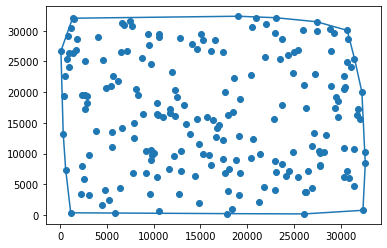

In [5]:
import matplotlib.pyplot as plt

inputSet = generate_points(200) # list of tuples
intermediate = grahamscan(inputSet) # stack
outputSet = get_elems_stack(intermediate)
print("generated: ")
print(inputSet)
print("stack: ")
print(intermediate)
print("final list: ")
print(outputSet)

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 